<h1>Using the yfinance Library</h1>

<h3>Imports</h3>

In [46]:
import yfinance as yf
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score, mean_squared_error

import pandas as pd
import numpy as np
import plotly.offline as plyo
import cufflinks as cf

<h3>Grabbing Tickers</h3>

In [47]:
all_tickers = "WFC MSFT INTC AMZN PYPL"
selected_stocks = yf.Tickers(all_tickers)
tickers = all_tickers.split(" ")

<h3>Getting the History for Each Ticker</h3>

In [49]:
selected_history = {}

for index in range(len(tickers)):
    selected_history[tickers[index]] = selected_stocks.tickers[index].history(period="1y")

<h3>Viewing Data</h3>

In [50]:
selected_history[tickers[0]].info()
selected_history[tickers[0]].tail(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-10-24 to 2020-10-23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Volume        253 non-null    int64  
 5   Dividends     253 non-null    float64
 6   Stock Splits  253 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 15.8 KB


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-10-12,25.200001,25.740000,25.150000,25.680000,25855600,0.0,0
2020-10-13,25.420000,25.500000,24.700001,24.740000,29939600,0.0,0
2020-10-14,24.270000,24.430000,23.230000,23.250000,75497800,0.0,0
2020-10-15,23.059999,23.090000,22.750000,22.950001,60328600,0.0,0
2020-10-16,23.010000,23.230000,22.610001,22.860001,43141200,0.0,0
2020-10-19,22.889999,22.910000,22.510000,22.540001,37423600,0.0,0
2020-10-20,22.730000,23.129999,22.690001,22.809999,34751200,0.0,0
2020-10-21,22.820000,22.950001,22.600000,22.700001,29528300,0.0,0
2020-10-22,22.660000,23.320000,22.610001,23.250000,32238300,0.0,0


<h3>Methods for Calculated Data Points</h3>

In [51]:
def getIntradayChangeInfo(data_set):
    data_set["Intraday Change"] = data_set["Open"] - data_set["Close"]
    data_set["Intraday Pct Change"] = data_set["Intraday Change"] / data_set["Open"]
    
    previous_day_change = 0
    previous_day_pct_change = 0
    all_previous_day_change = []
    all_previous_day_pct_change = []
    
    for index, row in data_set.iterrows():
        all_previous_day_change.append(previous_day_change)
        all_previous_day_pct_change.append(previous_day_pct_change)
        previous_day_change = row["Intraday Change"]
        previous_day_pct_change = row["Intraday Pct Change"]
        
    data_set["Previous Day Change"] = all_previous_day_change
    data_set["Previous Day Pct Change"] = all_previous_day_pct_change

<h3>Adding Calculated Data Points</h3>

In [52]:
for key, history in selected_history.items():
    getIntradayChangeInfo(history)
    print("For {}".format(key))
    print(history.head())

For WFC
                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2019-10-24  48.461860  48.978430  48.461860  48.882767  16695400        0.0   
2019-10-25  48.863638  49.485432  48.787107  49.332375  17433300        0.0   
2019-10-28  49.686315  49.791543  49.332371  49.408901  23914800        0.0   
2019-10-29  49.265411  50.088096  49.265411  49.906338  21063000        0.0   
2019-10-30  49.628926  50.011568  49.380205  49.772415  16155900        0.0   

            Stock Splits  Intraday Change  Intraday Pct Change  \
Date                                                             
2019-10-24             0        -0.420907            -0.008685   
2019-10-25             0        -0.468737            -0.009593   
2019-10-28             0         0.277414             0.005583   
2019-10-29             0        -0.640927            -0.013010   
2019-10-30             0        -0.143489 

<h3>Analysis Methods</h3>

In [54]:
def createLinearRegression(X, y):
    lr = LinearRegression()
    lr.fit(X, y)
    return lr

def testLinearRegression(model, X_train, X_test, y_train, y_test):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    preds = model.predict(X_test)
    score = explained_variance_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = math.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    
    print("Train Score: {}\nTest Score: {}"
          .format(train_score, test_score))
    print("Score Details = {:.5f} | MAE = {:.3f} | RMSE = {:.3f} | R2 = {:.5f}"
          .format(score, mae, rmse, r2))
    print("\n")
    

def conductLinearRegressionAnalysis(data_set, features, target):
    X = data_set[features]
    y = data_set[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    model= createLinearRegression(X_train, y_train)
    testLinearRegression(model, X_train, X_test, y_train, y_test)
    
    return model

<h3>Models for Selected Tickers</h3>

In [55]:
features = ["Previous Day Pct Change", "Previous Day Change","High", "Low", "Volume", "Open"]
target = "Intraday Pct Change"
models = {}

for key, history in selected_history.items():
    print("For: {}".format(key))
    models[key] = conductLinearRegressionAnalysis(history, features, target)

For: WFC
Train Score: 0.7461028306279756
Test Score: 0.7255822937720923
Score Details = 0.72563 | MAE = 0.008 | RMSE = 0.013 | R2 = 0.72558


For: MSFT
Train Score: 0.7523856042877011
Test Score: 0.6162459081949796
Score Details = 0.62109 | MAE = 0.006 | RMSE = 0.010 | R2 = 0.61625


For: INTC
Train Score: 0.8137567519277361
Test Score: 0.7611069836792534
Score Details = 0.76131 | MAE = 0.006 | RMSE = 0.008 | R2 = 0.76111


For: AMZN
Train Score: 0.8097989849191842
Test Score: 0.574198381714065
Score Details = 0.59211 | MAE = 0.009 | RMSE = 0.012 | R2 = 0.57420


For: PYPL
Train Score: 0.786439859040782
Test Score: 0.49280604115217186
Score Details = 0.49354 | MAE = 0.010 | RMSE = 0.014 | R2 = 0.49281




<h3>Getting Data for Last Month</h3>

In [56]:
selected_1m_history = {}

for index in range(len(tickers)):
    selected_1m_history[tickers[index]] = selected_stocks.tickers[index].history(period="1mo")
    getIntradayChangeInfo(selected_1m_history[tickers[index]])

<h3>Prediction Methods</h3>

In [57]:
def createPredictions(model, data_set, features):
    return model.predict(data_set[features])

<h3>Predicting the Last Month</h3>

In [58]:
for key, history in selected_1m_history.items():
    history["Prediction"] = createPredictions(models[key], history, features)

<h3>Plotting Methods</h3>

In [59]:
def plotResults(data_set, plot_values):
    plyo.iplot(data_set[plot_values].iplot(asFigure=True))

<h3>Plotting Actual vs Prediction</h3>

In [60]:
plot_values = [target, "Prediction"]

for key, history in selected_1m_history.items():
    print("For {}:".format(key))
    plotResults(history, plot_values)

For WFC:


For MSFT:


For INTC:


For AMZN:


For PYPL:


<h3>Selecting a Stock Based on Predictions</h3>

In [128]:
def getFinalPredictions(tickers):
    final_values = {}
    final_predictions = pd.Series(dtype="float64")
    for index in range(len(tickers)):
        final_values[tickers[index]] = selected_stocks.tickers[index].history(period="2d")
        getIntradayChangeInfo(final_values[tickers[index]])
    for key, values in final_values.items():
        values["Prediction"] = createPredictions(models[key], values, features)
        final_predictions[key] = values.iloc[-1]["Prediction"]
    return final_predictions

def displayFinalPredictions(final_predictions):
    final_predictions.plot(kind="bar")

def getRecommendation(final_predictions):
    return (final_predictions.idxmax(), final_predictions.max())

def printRecommendation(recommendation):
    print("Recommendation: Purchase {} due to predicted intraday price change of {:.2f}%.".format(recommendation[0], recommendation[1] * 100))

Recommendation: Purchase PYPL due to predicted intraday price change of 3.01%.


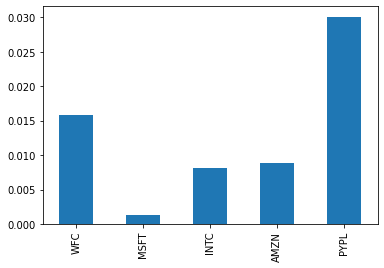

In [130]:
final_predictions = getFinalPredictions(tickers)
recommendation = getRecommendation(final_predictions)
printRecommendation(recommendation)
displayFinalPredictions(final_predictions)